In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv("Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df=df.drop("Serial No.", axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [5]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [8]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler1= StandardScaler()
df["GRE Score"] = scaler.fit_transform(df[["GRE Score"]])
df["TOEFL Score"] = scaler.fit_transform(df[["TOEFL Score"]])

In [9]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,4,4.5,4.5,9.65,1,0.92
1,0.68,0.535714,4,4.0,4.5,8.87,1,0.76
2,0.52,0.428571,3,3.0,3.5,8.00,1,0.72
3,0.64,0.642857,3,3.5,2.5,8.67,1,0.80
4,0.48,0.392857,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,0.84,0.571429,5,4.5,4.0,9.02,1,0.87
496,0.94,0.892857,5,5.0,5.0,9.87,1,0.96
497,0.80,1.000000,5,4.5,5.0,9.56,1,0.93
498,0.44,0.392857,4,4.0,5.0,8.43,0,0.73


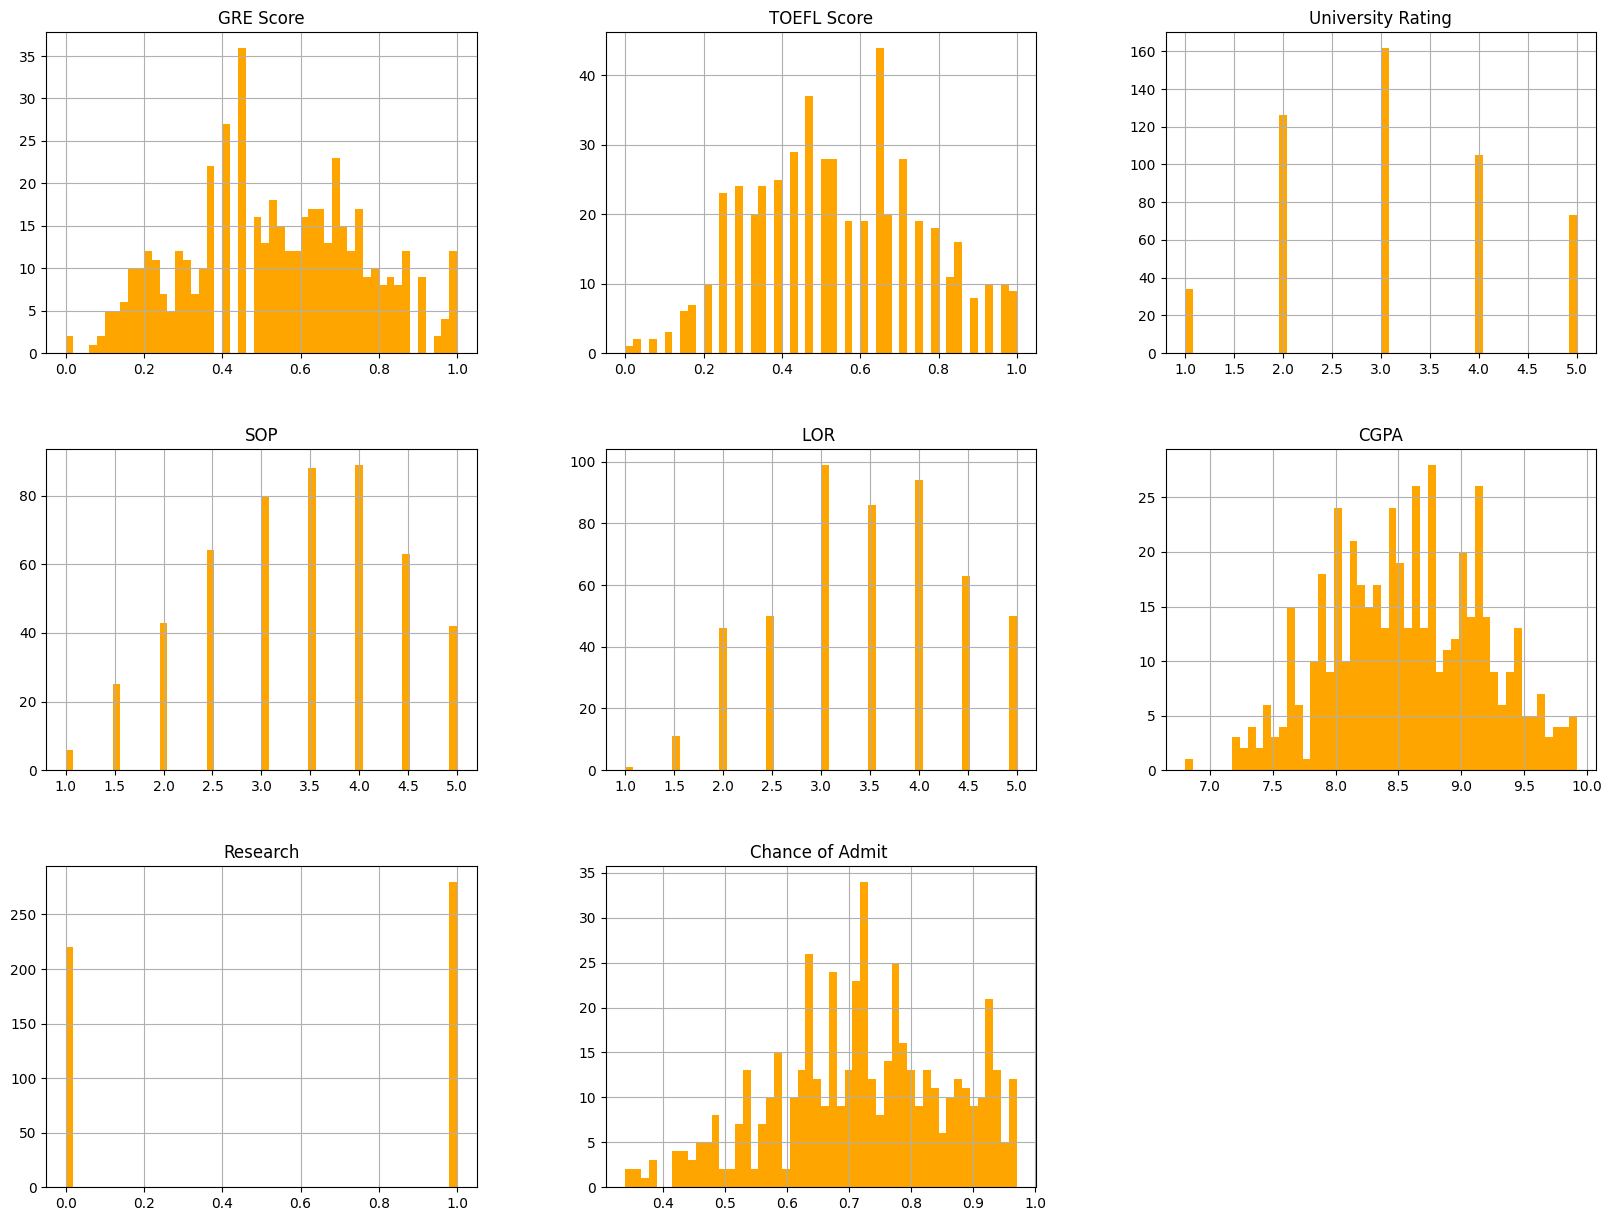

In [10]:
df.hist(bins=50, figsize=(20,15),color="orange")
plt.show()

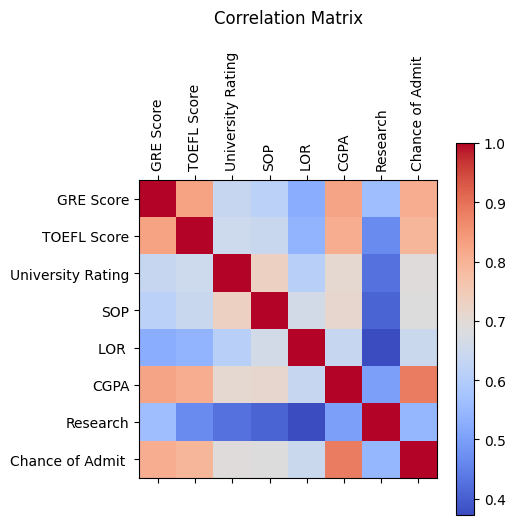

In [11]:
correlation_matrix = df.corr()
plt.matshow(correlation_matrix, cmap="coolwarm")
plt.colorbar()

# Add labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns,rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title("Correlation Matrix", pad=20)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X= df.iloc[:,0:-1]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,4,4.5,4.5,9.65,1
1,0.68,0.535714,4,4.0,4.5,8.87,1
2,0.52,0.428571,3,3.0,3.5,8.00,1
3,0.64,0.642857,3,3.5,2.5,8.67,1
4,0.48,0.392857,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,0.84,0.571429,5,4.5,4.0,9.02,1
496,0.94,0.892857,5,5.0,5.0,9.87,1
497,0.80,1.000000,5,4.5,5.0,9.56,1
498,0.44,0.392857,4,4.0,5.0,8.43,0


In [14]:
Y=df.iloc[:,-1]
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [15]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(400, 7)
(100, 7)
(400,)
(100,)


In [17]:
from sklearn.svm import SVR


In [18]:
lr= SVR(kernel="rbf",C=0.5,epsilon=0.001)
lr.fit(X_train,Y_train)

SVR(C=0.5, epsilon=0.001)

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score

In [20]:
def eval_metrics(actual,pred):
    rmse=np.sqrt(mean_squared_error(actual,pred))
    mae= mean_absolute_error(actual,pred)
    r2=r2_score(actual,pred)

    return rmse,mae,r2

In [21]:
predicted_value=lr.predict(X_test)
predicted_value

array([0.9190102 , 0.82230742, 0.57493387, 0.71607574, 0.82328904,
       0.87502244, 0.50894607, 0.65670636, 0.82966331, 0.80418042,
       0.72587594, 0.73409161, 0.67116733, 0.93818977, 0.8337317 ,
       0.52947746, 0.86797441, 0.61571712, 0.54888522, 0.57592085,
       0.66619536, 0.56921582, 0.74037257, 0.79672233, 0.78390018,
       0.61916137, 0.94046155, 0.86290758, 0.63705716, 0.7744501 ,
       0.57123927, 0.73449535, 0.55184482, 0.86694486, 0.66421625,
       0.74433115, 0.58352687, 0.95089177, 0.66109284, 0.7136494 ,
       0.94491327, 0.59109211, 0.67923807, 0.86627386, 0.94195388,
       0.59558898, 0.94425422, 0.84603151, 0.8080861 , 0.92966501,
       0.90463988, 0.58286902, 0.744742  , 0.55758963, 0.94336661,
       0.59746676, 0.95156054, 0.74517459, 0.67902946, 0.51856566,
       0.65044393, 0.6864247 , 0.61327473, 0.64151412, 0.47817862,
       0.59417665, 0.8749598 , 0.89596268, 0.6589646 , 0.7048004 ,
       0.63152471, 0.79193533, 0.70094581, 0.57201763, 0.58292

In [22]:
(rmse,mae,r2)=eval_metrics(Y_test,predicted_value)

In [23]:
print("rmse",rmse)
print("mae",mae)
print("r2",r2)

rmse 0.05965483487437924
mae 0.040191204330037006
r2 0.82598047315944
